<a href="https://colab.research.google.com/github/shuler7/DataMiningPublic/blob/main/SpaceTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Opening the Data

In [1]:
import numpy as np
import pandas as pd

In [106]:
df = pd.read_csv("https://github.com/shuler7/DataMiningPublic/raw/main/spaceship_titanic_train.csv")
df_test= pd.read_csv("https://github.com/shuler7/DataMiningPublic/raw/main/spaceship_titanic_test.csv")

In [3]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

# Processing the data

In [108]:
# Take the first letter from the cabin
df['CabinLetter'] = df['Cabin'].str[0]
df_test['CabinLetter'] = df_test['Cabin'].str[0]

# Take the relevant variables
X =df[['HomePlanet', 'CryoSleep', 'CabinLetter', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

X_TEST = df_test[['HomePlanet', 'CryoSleep', 'CabinLetter', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

y = df['Transported']

In [109]:
#Define imputers
from sklearn.impute import SimpleImputer
# Create an imputer object with the desired strategy (e.g., mean, median, most_frequent)
meanImputer = SimpleImputer(strategy='mean')
frequentImputer = SimpleImputer(strategy='most_frequent')
medianImputer = SimpleImputer(strategy='median')

#Take the most frequent values to fill in NA
X = pd.DataFrame(frequentImputer.fit_transform(X), columns=X.columns)
X_TEST = pd.DataFrame(frequentImputer.fit_transform(X_TEST), columns=X_TEST.columns)

#Encode categorical as True / False
X = pd.get_dummies(X, columns=['HomePlanet', 'CabinLetter', 'Destination' ])
X_TEST = pd.get_dummies(X_TEST, columns=['HomePlanet', 'CabinLetter', 'Destination' ])

# Building a Decision Tree Classifier

This [link](https://www.datacamp.com/tutorial/decision-tree-classification-python) helped me make this.

In [94]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [95]:
tree_clf.score(X_test, y_test)

0.7203311867525299

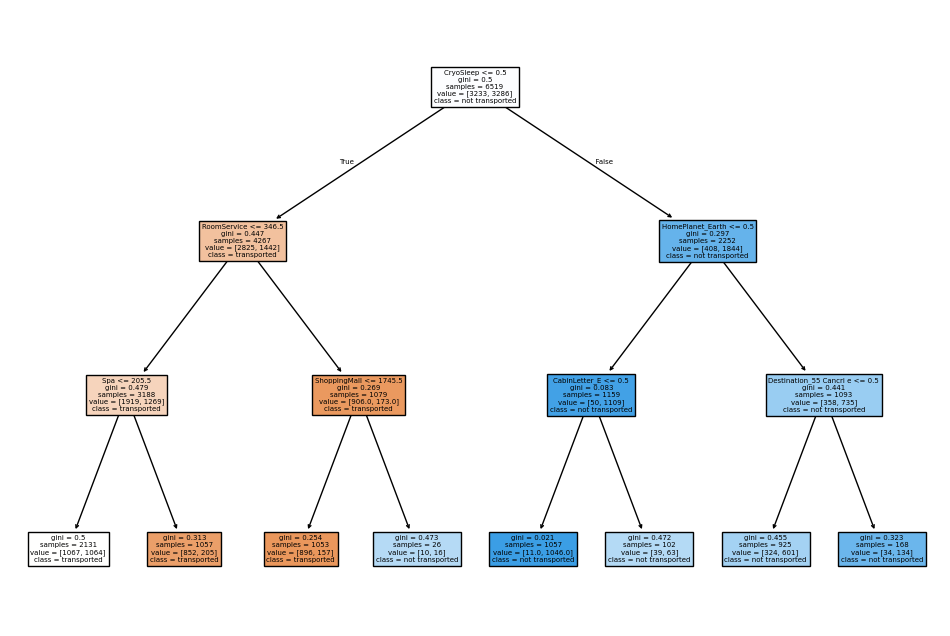

In [96]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

class_names = ['transported', 'not transported']

plt.figure(figsize=(12, 8))
tree.plot_tree(tree_clf, feature_names=X.columns, class_names = class_names, filled=True)
plt.show()

# Confusion Matrix

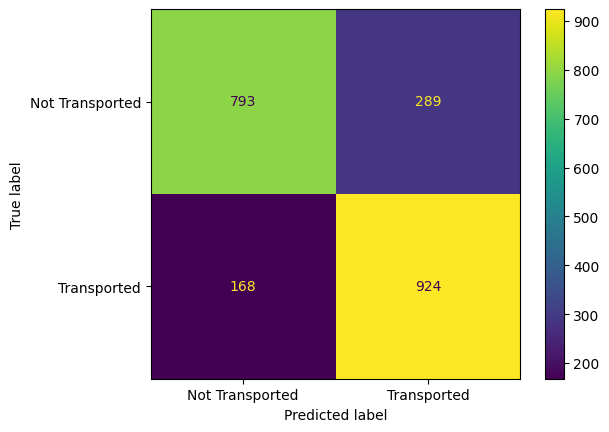

In [116]:
# View predictions accuracy
y_pred = voting_clf.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix( y_test, y_pred)
ConfusionMatrixDisplay( cm, display_labels=["Not Transported", "Transported"]).plot()
tn, fp, fn, tp = cm.ravel()

In [117]:
# True Positive Rate Recall / Sensitivity : the proportion of the positives that were detected
# tp / (tp + fn)
recall = tp / df["Transported"].value_counts()[True]
recall

0.21105527638190955

In [118]:
# True Negative Rate : the proportion of the negatives that were detected
# tn / (tn + fp)
tn / (tn+fp)

0.732902033271719

In [119]:
# Positive Predictive Value / Precision: Proportion that
# we said got transported truly got transported
# tp / (tp + fp)

precision = tp / (tp+fp)
precision

0.761747732893652

In [120]:
# Negative Predictive Value : Proportion that
# we said NOT transported were NOT transported
# tn / (tn + fn)

tn / (tn+fn)

0.8251821019771072

In [121]:
# Accuracy: Proportion of predictions that were correct.
(tp + tn)/(tp + tn + fp + fn)

0.7897884084636615

In [122]:
# F1 score
# 2*(recall)*(precision) / (recall + precision)
2*(recall)*(precision) / (recall + precision)

0.33053121087461995

# Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [99]:
#Calculates the accuracy of each of the three estimators
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.7888684452621895
rf = 0.7805887764489421
svc = 0.7796688132474701


In [103]:
#Calculates the accuracy score for the voting between the 3
voting_clf.score(X_test, y_test)

0.7897884084636615

# Make prediction and submit as CSV

In [111]:
# Make prediction
pred = voting_clf.predict(X_TEST)

In [112]:
submission = pd.DataFrame( {
    'PassengerId': df_test['PassengerId'],
    'Transported': pred
})

In [114]:
from google.colab import drive
drive.mount('/content/drive')

submission.to_csv('/content/drive/My Drive/SpaceTitanicSubmission.csv', index=False)

Mounted at /content/drive
